# Importing libraries

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tf.__version__

'2.5.0'

# Creating dataset

In [3]:
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
# X : x, y coordinates of points
# y : labels (0, 1)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

[]

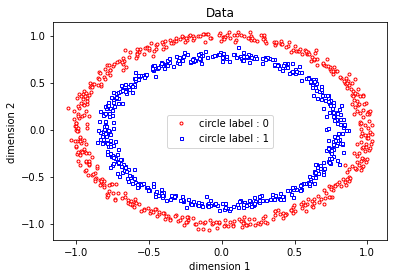

In [6]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro', markerfacecolor='w', markersize=3, label='circle label : 0')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', markerfacecolor='w', markersize=3, label='circle label : 1')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Data')
plt.legend()
plt.plot()

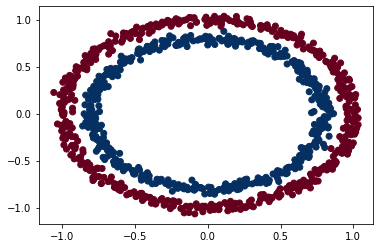

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.show()

# Input, output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

# Creating the model

In [11]:
classifier = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(2),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(1),
    ],
    name = "classifier"
)

In [15]:
classifier.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam()
)

In [16]:
history = classifier.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 3s 3ms/step - loss: 3.0704
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7500
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7053
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6978
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6948
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6939
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6939
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6937
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6938
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6940
Epoch 11/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6940
Epoch 12/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6941
Epoch 13/500
32/32 [=================

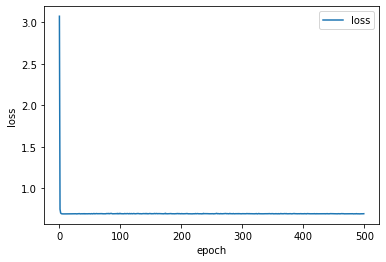

In [21]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [52]:
np.sum((classifier(X) > 0.5).numpy() == np.reshape((y == 1),(-1,1)))/len(y)

0.514